In [1]:
%matplotlib inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [3]:
re_unemp = pd.read_csv('data/newyork.csv')

re_unemp.head(5)

,Year,Period,employment,unemployment,unemployment rate,single_home_avg_prices,is_covid
0,2010,Jan,8737735,851309,8.9,213212.8604,0
1,2010,Feb,8757142,848806,8.8,213200.9914,0
2,2010,Mar,8776986,844241,8.8,213147.9563,0
3,2010,Apr,8792421,838058,8.7,213323.9791,0
4,2010,May,8801543,829986,8.6,213415.4114,0


In [4]:
X = re_unemp[["employment", "unemployment", "is_covid"]]
y = re_unemp["single_home_avg_prices"].values.reshape(-1, 1)
print(X.shape, y.shape)

(125, 3) (125, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8296703637111056
Testing Score: 0.8724876945900283


Text(0.5, 1.0, 'Residual Plot')

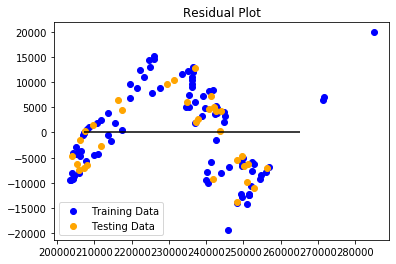

In [8]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")